In [312]:
# Determine which factors drive sales the most
# Hypothesis: members spend more than non-members
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 17) # Adjusts the config of the plots we create

# Read in the data

df = pd.read_csv(r'C:\Users\Neyhart\Desktop\Portfolio\supermarket_sales - Sheet1.csv')

In [313]:
# let's see the data

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [314]:
# Checking to see if data is missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.1f}%'.format(col, pct_missing*100))

Invoice ID - 0.0%
Branch - 0.0%
City - 0.0%
Customer type - 0.0%
Gender - 0.0%
Product line - 0.0%
Unit price - 0.0%
Quantity - 0.0%
Tax 5% - 0.0%
Total - 0.0%
Date - 0.0%
Time - 0.0%
Payment - 0.0%
cogs - 0.0%
gross margin percentage - 0.0%
gross income - 0.0%
Rating - 0.0%


In [315]:
# Check datatypes for the columns in the dataset

df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [318]:
# Changing the data type of Total from object to float64
df['Total'].astype('float64')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [319]:
# Show all data from now on
# pd.set_option('display.max_rows', None)

In [320]:
# Drop dups
# Clean the data from the 'year' column to strip the preceding '/'
df.drop_duplicates()
del df['gross margin percentage'] #margin is a fixed value and is not relevant for this exercise
# deleting the next 3 columns because they are a direct correlation with Total because the margin % is fixed.
df.drop(columns=['Tax 5%', 'cogs', 'gross income'], inplace=True)

In [321]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,5.3


In [323]:
# Dropping duplicates and sorting the list by Invoice ID
df['Invoice ID'].drop_duplicates().sort_values(ascending=False)


336    898-04-2717
844    896-34-0956
185    895-66-0685
855    895-03-6665
160    894-41-5205
534    892-05-6689
214    891-58-8335
450    891-01-7034
355    889-04-9723
210    888-02-0338
923    887-42-0517
786    886-77-9084
769    886-54-6089
990    886-18-2897
876    885-56-0389
394    885-17-6250
887    884-80-6021
975    883-69-1285
252    883-17-4236
405    882-40-4577
601    881-41-7302
889    880-46-5796
593    880-35-0356
465    878-30-2331
65     877-22-3308
203    875-46-5808
777    875-31-8302
342    873-95-4984
92     873-51-0671
870    873-14-6353
30     871-79-8483
97     871-39-9221
312    870-76-1733
80     870-72-4431
126    870-54-3162
818    869-11-3082
330    868-81-1752
382    868-52-7573
698    868-06-0466
958    867-47-1948
561    866-99-7614
853    866-70-2814
246    866-05-7563
98     865-92-6136
903    865-41-9075
797    864-24-7918
497    862-59-8517
847    862-29-5914
507    862-17-9201
109    861-77-0145
350    860-79-0874
842    860-73-6466
946    859-9

In [324]:
# Numerically assigning values to text fields in order to draw correlations (can only be done on numerical fields)
df_numerical = df

for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'): 
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes

df_numerical.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,814,0,2,0,0,3,74.69,7,548.9715,26,146,2,9.1
1,142,2,1,1,0,0,15.28,5,80.2200,87,23,0,9.6
2,653,0,2,1,1,4,46.33,7,340.5255,81,155,1,7.4
3,18,0,2,0,1,3,58.22,8,489.0480,19,485,2,8.4
4,339,0,2,1,1,5,86.31,7,634.3785,57,29,2,5.3


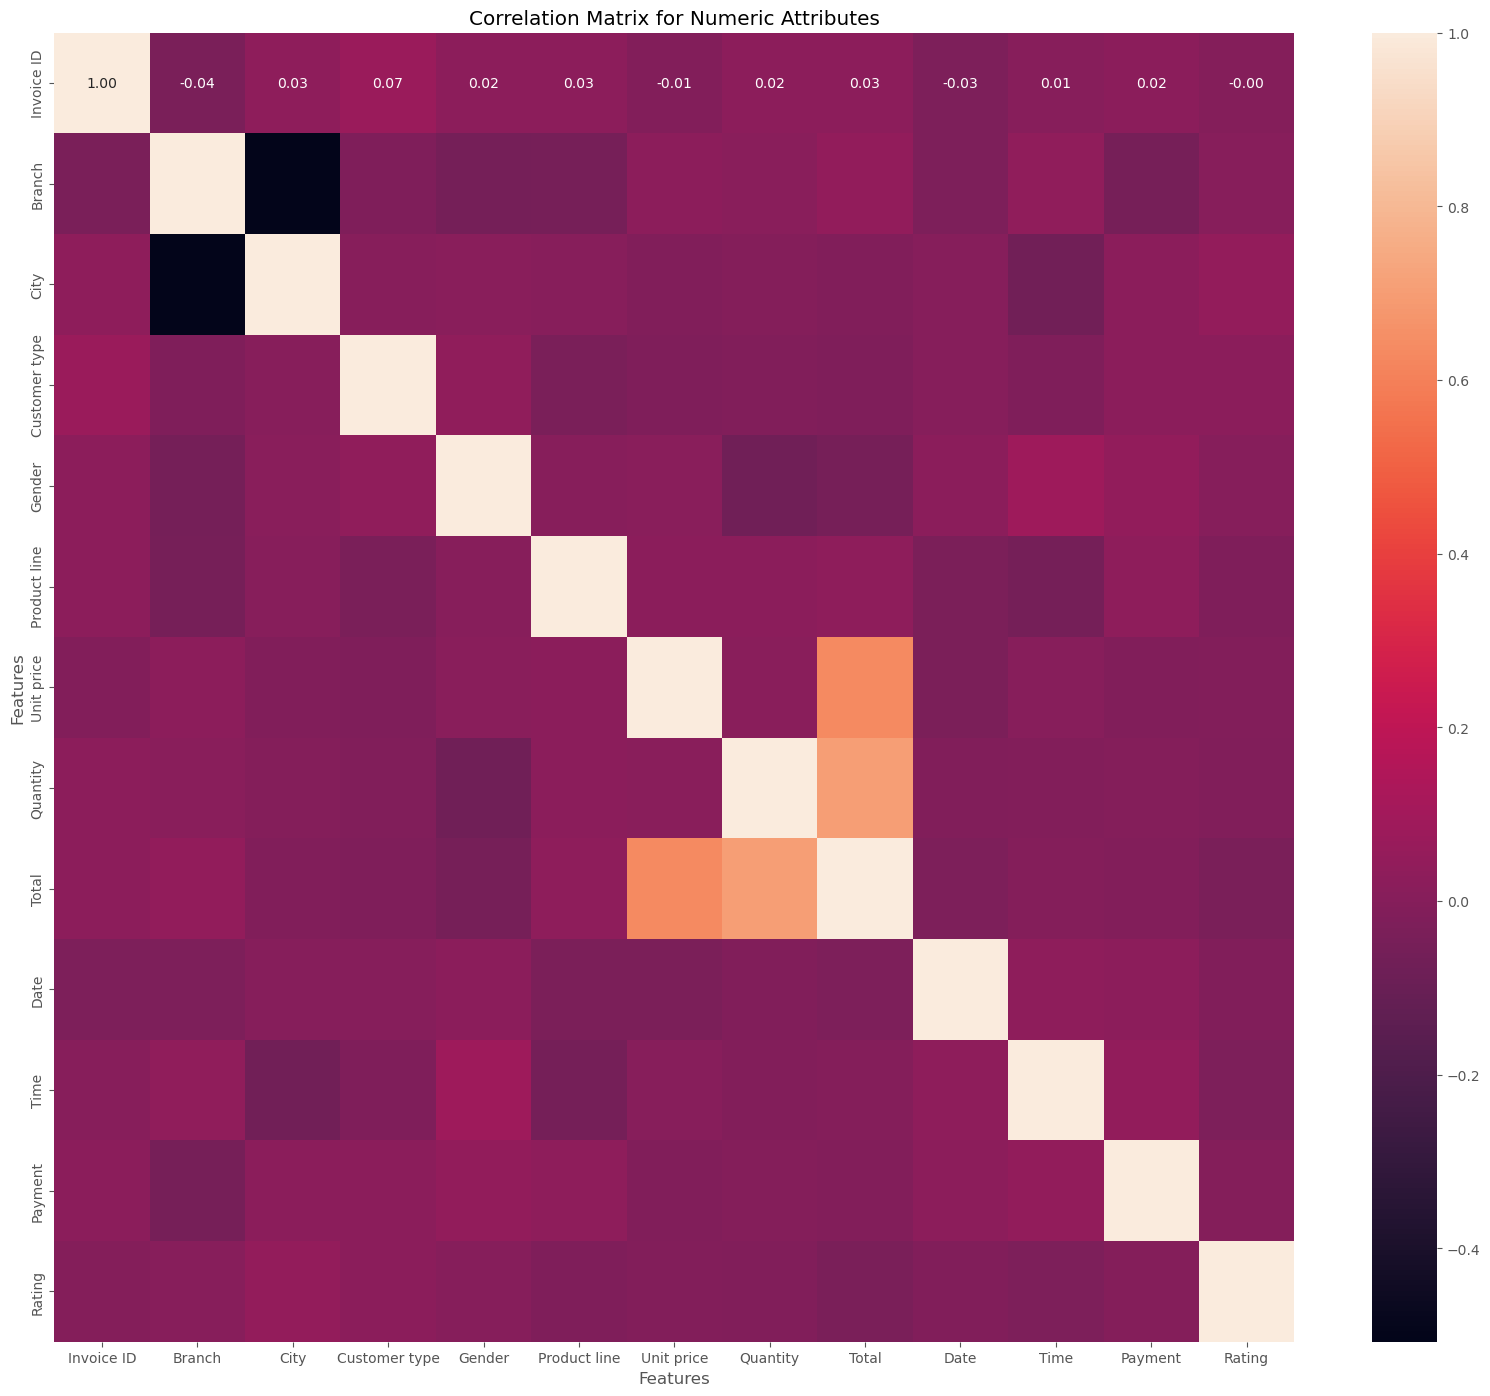

In [325]:
# Let's create a correlation heatmap using these newly created numerical values

correlation_mtrx = df_numerical.corr(method = 'pearson')

sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")

plt.title('Correlation Matrix for Numeric Attributes')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [326]:
# Now, let's see the same data as a numberical matrix
df_numerical.corr()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
Invoice ID,1.000000,-0.041753,0.031247,0.070519,0.023552,0.027589,-0.009213,0.024977,0.027277,-0.025614,0.009224,0.021478,-0.003787
Branch,-0.041753,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,0.028202,0.015964,0.041047,-0.025768,0.035921,-0.050104,0.010238
City,0.031247,-0.507401,1.000000,0.004899,0.012219,0.008811,-0.013763,-0.002121,-0.012812,0.002043,-0.066115,0.019094,0.049585
Customer type,0.070519,-0.019608,0.004899,1.000000,0.039996,-0.036800,-0.020238,-0.016763,-0.019670,-0.000419,-0.020162,0.018073,0.018889
Gender,0.023552,-0.056318,0.012219,0.039996,1.000000,0.005193,0.015445,-0.074258,-0.049451,0.021450,0.085054,0.044578,0.004800
Product line,0.027589,-0.053938,0.008811,-0.036800,0.005193,1.000000,0.019321,0.020256,0.031621,-0.032970,-0.058607,0.029896,-0.020529
Unit price,-0.009213,0.028202,-0.013763,-0.020238,0.015445,0.019321,1.000000,0.010778,0.633962,-0.033470,0.008155,-0.015941,-0.008778
Quantity,0.024977,0.015964,-0.002121,-0.016763,-0.074258,0.020256,0.010778,1.000000,0.705510,-0.013842,-0.009045,-0.003921,-0.015815
Total,0.027277,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,-0.025537,-0.005298,-0.012434,-0.036442
Date,-0.025614,-0.025768,0.002043,-0.000419,0.021450,-0.032970,-0.033470,-0.013842,-0.025537,1.000000,0.031349,0.025667,-0.017183


In [327]:
# Let's unstack those same values and create a list of pairs
correlation_mat = df_numerical.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Invoice ID     Invoice ID       1.000000
               Branch          -0.041753
               City             0.031247
               Customer type    0.070519
               Gender           0.023552
               Product line     0.027589
               Unit price      -0.009213
               Quantity         0.024977
               Total            0.027277
               Date            -0.025614
               Time             0.009224
               Payment          0.021478
               Rating          -0.003787
Branch         Invoice ID      -0.041753
               Branch           1.000000
               City            -0.507401
               Customer type   -0.019608
               Gender          -0.056318
               Product line    -0.053938
               Unit price       0.028202
               Quantity         0.015964
               Total            0.041047
               Date            -0.025768
               Time             0.035921
               P

In [328]:
# By sorting this list, we'll ungroup the list
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

City           Branch          -0.507401
Branch         City            -0.507401
Gender         Quantity        -0.074258
Quantity       Gender          -0.074258
Time           City            -0.066115
City           Time            -0.066115
Product line   Time            -0.058607
Time           Product line    -0.058607
Branch         Gender          -0.056318
Gender         Branch          -0.056318
Branch         Product line    -0.053938
Product line   Branch          -0.053938
Branch         Payment         -0.050104
Payment        Branch          -0.050104
Total          Gender          -0.049451
Gender         Total           -0.049451
Branch         Invoice ID      -0.041753
Invoice ID     Branch          -0.041753
Customer type  Product line    -0.036800
Product line   Customer type   -0.036800
Total          Rating          -0.036442
Rating         Total           -0.036442
Unit price     Date            -0.033470
Date           Unit price      -0.033470
               P

In [329]:
# Let's trim down the list to only the highly correlated results
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs <= 1.0)] 
print(high_corr)

Total          Unit price       0.633962
Unit price     Total            0.633962
Total          Quantity         0.705510
Quantity       Total            0.705510
Invoice ID     Invoice ID       1.000000
Unit price     Unit price       1.000000
Time           Time             1.000000
Date           Date             1.000000
Total          Total            1.000000
Quantity       Quantity         1.000000
Product line   Product line     1.000000
Gender         Gender           1.000000
Customer type  Customer type    1.000000
City           City             1.000000
Branch         Branch           1.000000
Payment        Payment          1.000000
Rating         Rating           1.000000
dtype: float64


In [330]:
# Conclusion: I was wrong!  Members vs non-members had a very low correlation to Total. 
#             However, unit price and quantity both had a high correlation to Total.  
#             This simply means that customers who buy more higher priced items have a larger Total at the end. 
#             This is intuitive.